In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter('ignore',category='ConvergenceWarning')

In [2]:
df_brand = pd.read_csv("Netflix Userbase.csv")
df_brand

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [3]:
df_olah = pd.read_csv("Netflix Userbase.csv")
df_olah


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [4]:
print(f"Rows: {df_brand.shape[0]}, Columns: {df_brand.shape[1]}")
print(f"Duplicates: {df_brand.duplicated().sum()}") 
print(f"missing data: {sum(df_brand.isna().sum())}")

Rows: 2500, Columns: 10
Duplicates: 0
missing data: 0


In [5]:
df_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
df_brand[['Subscription Type']].value_counts()


Subscription Type
Basic                999
Standard             768
Premium              733
Name: count, dtype: int64

In [7]:
df_brand[['Device']].value_counts()

Device    
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [8]:
df_brand[['Country']].value_counts()

Country       
Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: count, dtype: int64

In [9]:
df_brand[['Gender']].value_counts()

Gender
Female    1257
Male      1243
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping = {'Basic':0,'Standard':1,'Premium':2}
df_brand['Subscription Type'] = le.fit_transform(df_brand['Subscription Type'].map(mapping))

In [11]:
df_brand

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,0,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,2,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,1,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,1,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,0,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,2,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,0,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,1,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,1,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [12]:
jenis_kelamin = {"Male":0,"Female":1}
df_brand['Gender'] = le.fit_transform(df_brand['Gender'].map(jenis_kelamin))

In [13]:
df_brand

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,0,10,15-01-22,10-06-23,United States,28,0,Smartphone,1 Month
1,2,2,15,05-09-21,22-06-23,Canada,35,1,Tablet,1 Month
2,3,1,12,28-02-23,27-06-23,United Kingdom,42,0,Smart TV,1 Month
3,4,1,12,10-07-22,26-06-23,Australia,51,1,Laptop,1 Month
4,5,0,10,01-05-23,28-06-23,Germany,33,0,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,2,14,25-07-22,12-07-23,Spain,28,1,Smart TV,1 Month
2496,2497,0,15,04-08-22,14-07-23,Spain,33,1,Smart TV,1 Month
2497,2498,1,12,09-08-22,15-07-23,United States,38,0,Laptop,1 Month
2498,2499,1,13,12-08-22,12-07-23,Canada,48,1,Tablet,1 Month


In [14]:
# device = {"Laptop":0,"Tablet":1,"Smartphone":2,"Smart TV":3}
# df_brand['Device'] = le.fit_transform(df_brand['Device'].map(device))
# df_brand

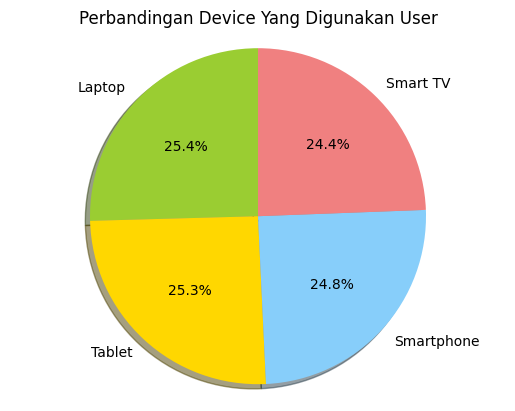

In [15]:
labels = ['Laptop','Tablet','Smartphone','Smart TV']
quantity = [636,633,621,610]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.title('Perbandingan Device Yang Digunakan User')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [16]:
df_brand

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,0,10,15-01-22,10-06-23,United States,28,0,Smartphone,1 Month
1,2,2,15,05-09-21,22-06-23,Canada,35,1,Tablet,1 Month
2,3,1,12,28-02-23,27-06-23,United Kingdom,42,0,Smart TV,1 Month
3,4,1,12,10-07-22,26-06-23,Australia,51,1,Laptop,1 Month
4,5,0,10,01-05-23,28-06-23,Germany,33,0,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,2,14,25-07-22,12-07-23,Spain,28,1,Smart TV,1 Month
2496,2497,0,15,04-08-22,14-07-23,Spain,33,1,Smart TV,1 Month
2497,2498,1,12,09-08-22,15-07-23,United States,38,0,Laptop,1 Month
2498,2499,1,13,12-08-22,12-07-23,Canada,48,1,Tablet,1 Month


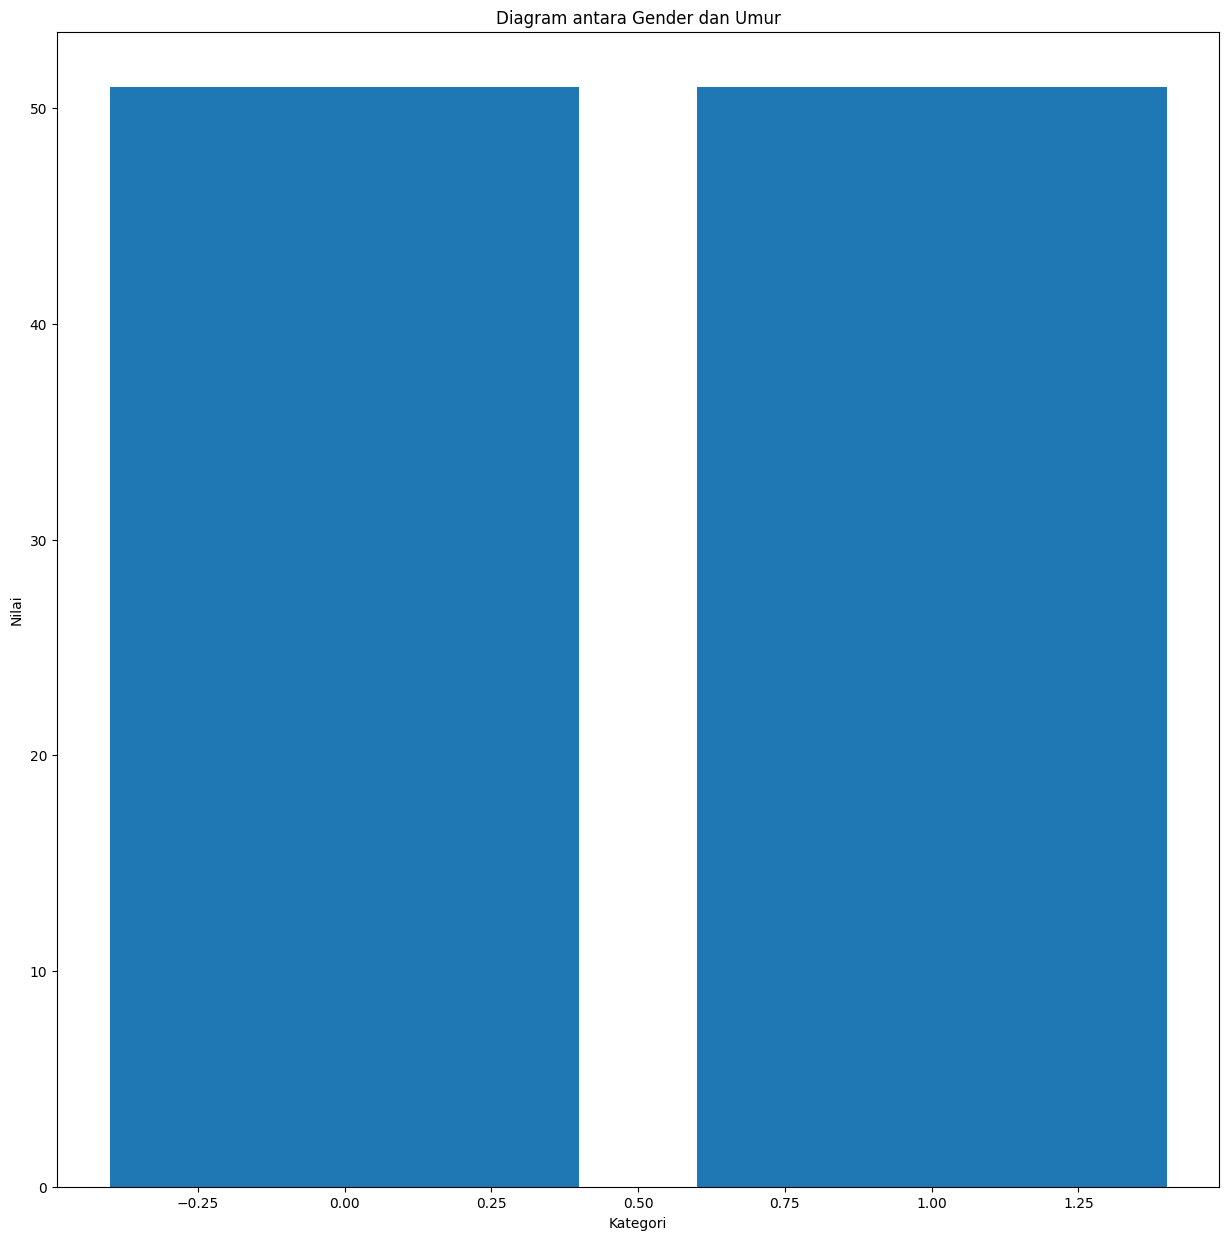

In [17]:
x = df_brand['Gender']
y = df_brand['Age']

plt.figure(figsize=(15,15))
plt.bar(x, y)
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Diagram antara Gender dan Umur')
plt.show()

In [18]:
df_brand.shape[0] 

2500

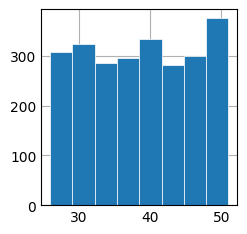

In [19]:
plt.style.use('_mpl-gallery')

x = df_brand['Age']

fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

plt.show()

FILTER DATA SESUAI KEINGINAN KITA CONTOH PERTANYAAN ("TAMPILKAN DATA DENGAN DEVICE YANG SMARTPHONE TETAPI HANYA BASIC USER SAJA YANG DITAMPILKAN")

In [20]:
df_olah


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [21]:
df1 = df_olah[df_olah['Device'] == 'Smartphone']
df1


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
10,11,Basic,10,16-05-22,22-06-23,United States,31,Female,Smartphone,1 Month
13,14,Basic,10,01-08-22,26-06-23,Australia,27,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2470,2471,Basic,10,17-10-22,11-07-23,United States,46,Male,Smartphone,1 Month
2485,2486,Basic,10,25-07-22,14-07-23,United States,40,Female,Smartphone,1 Month
2487,2488,Standard,11,18-07-22,13-07-23,United Kingdom,29,Female,Smartphone,1 Month
2488,2489,Basic,11,17-07-22,12-07-23,Australia,48,Female,Smartphone,1 Month


In [22]:
df2 = df_olah.loc[(df_olah['Device'] == 'Smartphone') & (df_olah['Subscription Type'] == 'Basic')]
df2

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
10,11,Basic,10,16-05-22,22-06-23,United States,31,Female,Smartphone,1 Month
13,14,Basic,10,01-08-22,26-06-23,Australia,27,Male,Smartphone,1 Month
21,22,Basic,10,22-07-22,28-06-23,Canada,34,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2449,2450,Basic,13,29-10-22,13-07-23,Italy,47,Female,Smartphone,1 Month
2466,2467,Basic,15,26-10-22,11-07-23,Spain,40,Female,Smartphone,1 Month
2470,2471,Basic,10,17-10-22,11-07-23,United States,46,Male,Smartphone,1 Month
2485,2486,Basic,10,25-07-22,14-07-23,United States,40,Female,Smartphone,1 Month


In [23]:
df3 = df_olah.loc[(df_olah['Device'] == 'Smartphone') & (df_olah['Subscription Type'] == 'Basic') & (df_olah['Gender']== "Male") & (df_olah['Age'] >= 40)]
df3

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
29,30,Basic,10,17-05-23,22-06-23,Italy,42,Male,Smartphone,1 Month
41,42,Basic,10,15-06-22,28-06-23,Canada,40,Male,Smartphone,1 Month
49,50,Basic,10,02-06-23,22-06-23,Italy,45,Male,Smartphone,1 Month
69,70,Basic,10,08-05-23,22-06-23,Italy,41,Male,Smartphone,1 Month
124,125,Basic,12,21-08-22,24-06-23,Germany,42,Male,Smartphone,1 Month
220,221,Basic,12,26-11-22,25-06-23,United States,47,Male,Smartphone,1 Month
286,287,Basic,10,16-10-22,26-06-23,Brazil,43,Male,Smartphone,1 Month
289,290,Basic,12,25-11-22,30-06-23,Italy,48,Male,Smartphone,1 Month
296,297,Basic,13,02-11-22,24-06-23,Brazil,40,Male,Smartphone,1 Month
321,322,Basic,15,04-06-22,27-06-23,Canada,44,Male,Smartphone,1 Month


In [24]:
df_olah = df_olah.drop(['User ID'], axis=1)
df_olah

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [25]:
df_olah['Status Usia'] = df_olah['Age'].apply(lambda x: 'Dewasa' if x >= 35 else 'belum dewasa') 
df_olah

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Status Usia
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,belum dewasa
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,Dewasa
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Dewasa
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,Dewasa
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,belum dewasa
...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,belum dewasa
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,belum dewasa
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,Dewasa
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,Dewasa


DATA MANIPULATION ( MENAMBAH KOLOM BARU DENGAN ISI ALGORITMA YANG KITA BUAT )

In [26]:
df_modif = pd.read_csv("Netflix Userbase.csv")
df_modif

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [27]:
df_modif = df_modif.drop(['User ID'], axis=1)
df_modif

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [28]:
df_modif['Age'].value_counts()

Age
39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64

In [29]:
df_modif['Status Usia'] = df_modif['Age'].apply(lambda x: 'Muda' if x <= 28 else ('Dewasa' if x <= 35 else ('Lanjut Usia' if x <= 50 else "Sepuh")) )
df_modif

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Status Usia
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,Muda
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,Dewasa
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Lanjut Usia
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,Sepuh
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,Dewasa
...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,Muda
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,Dewasa
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,Lanjut Usia
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,Lanjut Usia


In [30]:
df_modif['Status Usia'].value_counts()

Status Usia
Lanjut Usia    1491
Dewasa          713
Muda            203
Sepuh            93
Name: count, dtype: int64

In [31]:
df_modif['Device'] = df_modif['Device'].replace('Smartphone', 'HP')
df_modif

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Status Usia
0,Basic,10,15-01-22,10-06-23,United States,28,Male,HP,1 Month,Muda
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,Dewasa
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Lanjut Usia
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,Sepuh
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,HP,1 Month,Dewasa
...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,Muda
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,Dewasa
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,Lanjut Usia
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,Lanjut Usia


In [32]:
df_modif['Subscription Type'] = df_modif['Subscription Type'].replace('Basic', 'Trial User')
df_modif['Subscription Type'] = df_modif['Subscription Type'].replace('Standard', 'Free User')
df_modif

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Status Usia
0,Trial User,10,15-01-22,10-06-23,United States,28,Male,HP,1 Month,Muda
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,Dewasa
2,Free User,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Lanjut Usia
3,Free User,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,Sepuh
4,Trial User,10,01-05-23,28-06-23,Germany,33,Male,HP,1 Month,Dewasa
...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,Muda
2496,Trial User,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,Dewasa
2497,Free User,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,Lanjut Usia
2498,Free User,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,Lanjut Usia


VISUALISASI

In [33]:
df_visual = pd.read_csv('Netflix Userbase.csv')
df_visual

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


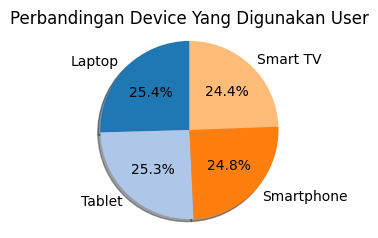

In [34]:
df_pie = df_visual['Device'].value_counts()

labels = df_pie.index
quantity = df_pie.values
colors = plt.cm.tab20(range(len(labels)))

plt.title('Perbandingan Device Yang Digunakan User')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [35]:
df_tes1 = df_visual.loc[(df_visual['Gender'] == 'Female')]
df_tes1

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month
...,...,...,...,...,...,...,...,...,...,...
2494,2495,Basic,15,23-07-22,12-07-23,Italy,43,Female,Laptop,1 Month
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


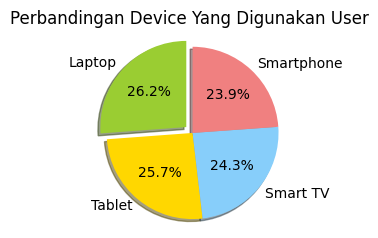

In [36]:
df_piechart = df_tes1['Device'].value_counts()

labels = df_piechart.index
quantity = df_piechart.values
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0, 0)

plt.title('Perbandingan Device Yang Digunakan User')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)

plt.axis('equal')
plt.show()

DIAGRAM BATANG

In [37]:
df_visual['Device'] = df_visual['Device'].replace('Smartphone', 'HP')
df_visual

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,HP,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,HP,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


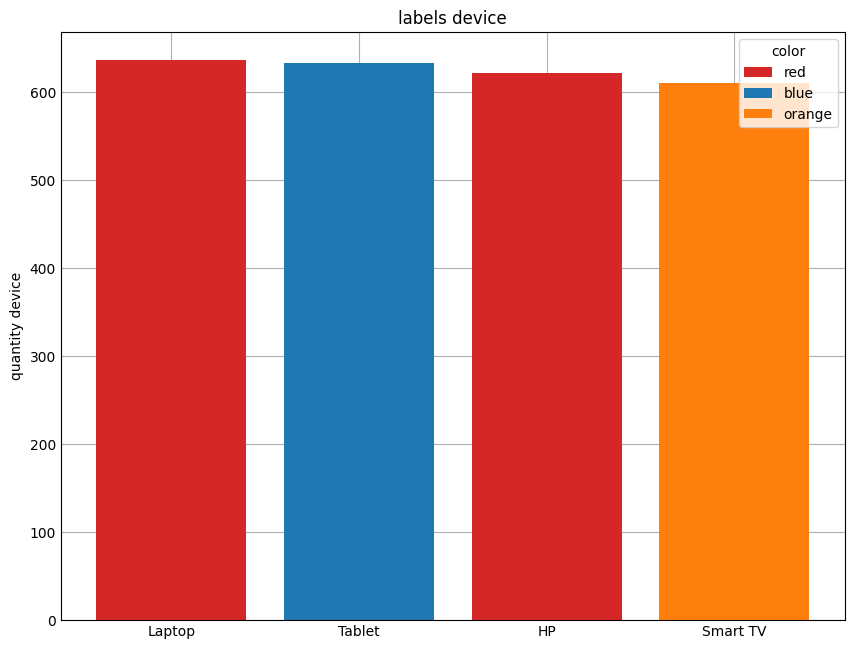

In [38]:
df_bar = df_visual['Device'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))
labels = df_bar.index
quantity = df_bar.values
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
ax.bar(labels, quantity, label=bar_labels, color=bar_colors)

ax.set_ylabel('quantity device')
ax.set_title('labels device')
ax.legend(title='color')

plt.show()

In [39]:
df_visual['Device'].value_counts()

Device
Laptop      636
Tablet      633
HP          621
Smart TV    610
Name: count, dtype: int64

PEMANASAN

In [40]:
df_net = pd.read_csv("Netflix Userbase.csv")
df_net

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [44]:
df_fil = df_net.loc[(df_net['Device'] == 'Smartphone') & (df_net['Subscription Type'] == 'Basic') & (df_net['Gender'] == 'Male') & (df_net['Age'] >=  40)]
df_fil


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
29,30,Basic,10,17-05-23,22-06-23,Italy,42,Male,Smartphone,1 Month
41,42,Basic,10,15-06-22,28-06-23,Canada,40,Male,Smartphone,1 Month
49,50,Basic,10,02-06-23,22-06-23,Italy,45,Male,Smartphone,1 Month
69,70,Basic,10,08-05-23,22-06-23,Italy,41,Male,Smartphone,1 Month
124,125,Basic,12,21-08-22,24-06-23,Germany,42,Male,Smartphone,1 Month
220,221,Basic,12,26-11-22,25-06-23,United States,47,Male,Smartphone,1 Month
286,287,Basic,10,16-10-22,26-06-23,Brazil,43,Male,Smartphone,1 Month
289,290,Basic,12,25-11-22,30-06-23,Italy,48,Male,Smartphone,1 Month
296,297,Basic,13,02-11-22,24-06-23,Brazil,40,Male,Smartphone,1 Month
321,322,Basic,15,04-06-22,27-06-23,Canada,44,Male,Smartphone,1 Month


In [49]:
df_net['Status Usia'] = df_net['Age'].apply(lambda x: 'Muda' if x <= 25 else ('Dewasa' if x <= 40 else ('Tua' if x <= 50 else 'sepuh'))) 
df_net


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Status Usia
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,Dewasa
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,Dewasa
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Tua
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,sepuh
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,Dewasa
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,Dewasa
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,Dewasa
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,Dewasa
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,Tua


In [51]:
df_net['Status Usia'].value_counts()

Status Usia
Dewasa    1430
Tua        977
sepuh       93
Name: count, dtype: int64